# Image Model Interpretation

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet50 import preprocess_input, ResNet50
import keras.models
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

Some necessary functions for this.

In [2]:
def get_batch_preds(dataset, model, i):
    batch = dataset[i]
    batch_imgs = batch[0]
    batch_labels = batch[1]
    batch_preds = model.predict(batch_imgs)
    
    return batch_labels, batch_preds

In [3]:
# display batch for evaluation
# since each batch has 32 items, we will display 16 for visual purposes
def plot_batch(pred_arr, true_arr, img):

    plt.figure(figsize=(16,16))
    
    for i in range(16):
        x = i % 4
        y = i // 4
        
        plt.subplot(4, 4, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img[i*2])
        
        pred_label = np.argmax(pred_arr[i*2])
        if pred_label == np.argmax(true_arr[i*2]):
            color = 'green'
        else:
            color = 'red'
        
        plt.xlabel('Pred: {} {:2.0f}%\nTrue: {}'.format(label_names[pred_label],
                                                             100*np.max(pred_arr[i*2]),
                                                             label_names[np.argmax(true_arr[i*2])]),
                         color=color)
    plt.show()

In [4]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=IMAGE_SIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Interpreting 'my_model'

In [5]:
# load model from 'my_model'
model = keras.models.load_model('my_model')

In [6]:
IMAGE_SIZE = (160, 160)
BATCH_SIZE = 32
NUM_CLASSES = 4

data_gen = image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split = 0.2,
    #rescale=1./255.
)

train_ds = data_gen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    seed=420
)

val_ds = data_gen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    subset='validation',
    seed=420
)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
# true labels, predicted labels
first_labels, first_preds = get_batch_preds(val_ds, model, 0)

In [23]:
# labels are in integers, so I used val_ds.filepaths to determine the label names
label_names = ['cheetah', 'jaguar', 'leopard', 'snow leopard']
label_names

['cheetah', 'jaguar', 'leopard', 'snow leopard']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

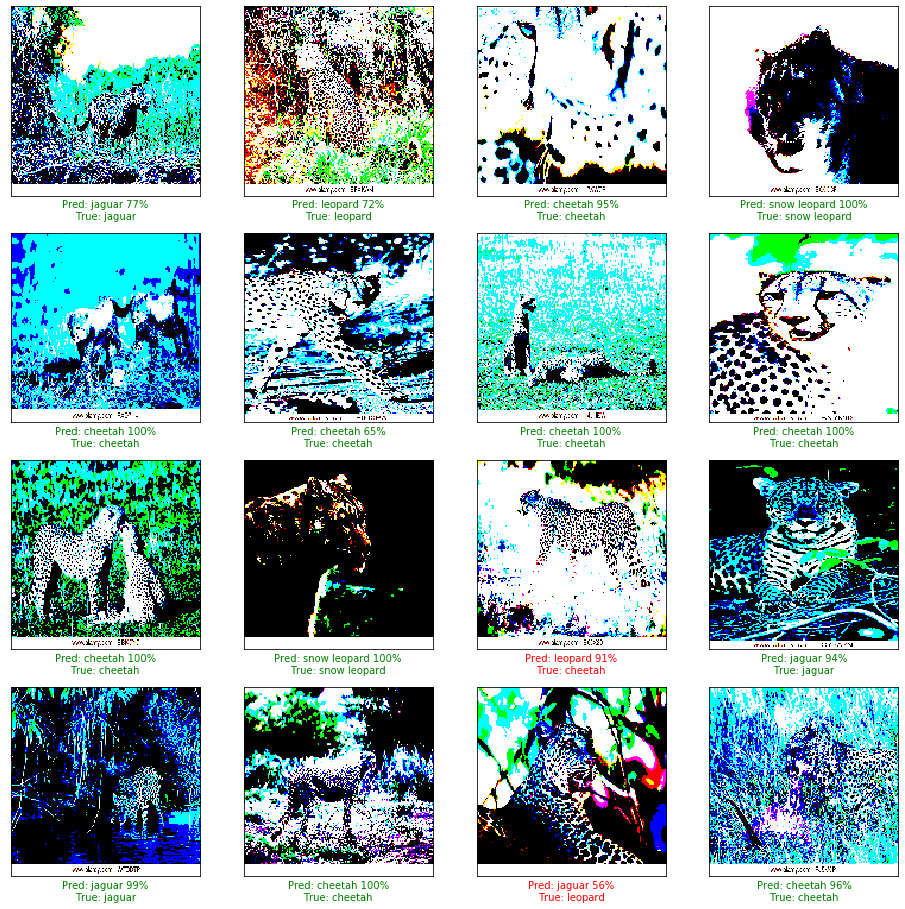

In [9]:
plot_batch(first_preds, first_labels, val_ds[0][0])

Reference:
https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

In [10]:
# list the filepaths associated with the images above
img_paths = np.array(val_ds.filenames)[val_ds.index_array[:BATCH_SIZE:2]]
img_paths

array(['jaguar/jaguar_121.jpg', 'leopard/leopard_114.jpg',
       'cheetah/cheetah_138.jpg', 'snow leopard/b0xccf.jpg',
       'cheetah/cheetah_161.jpg', 'cheetah/cheetah_194.jpg',
       'cheetah/cheetah_171.jpg', 'cheetah/bnym6x.jpg',
       'cheetah/bbkdy7.jpg', 'snow leopard/2b6dey5.jpg',
       'cheetah/b60x20.jpg', 'jaguar/jaguar_152.jpg',
       'jaguar/jaguar_166.jpg', 'cheetah/2bkj609.jpg',
       'leopard/2b1ejbd.jpg', 'cheetah/cheetah_175.jpg'], dtype='<U33')

In [11]:
imgs = transform_img_fn([os.path.join('dataset', img_path) for img_path in img_paths])
imgs

array([[[[-5.7939003e+01, -1.9778999e+01, -1.6680000e+01],
         [-7.9390030e+00,  3.7221001e+01,  3.6320000e+01],
         [-7.3939003e+01, -2.2778999e+01, -2.5680000e+01],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.3006100e+02,  1.0022100e+02,  7.2320000e+01]],

        [[-2.9939003e+01, -1.7789993e+00,  6.3199997e+00],
         [-4.5939003e+01, -1.0778999e+01, -5.6800003e+00],
         [-5.4939003e+01, -1.3778999e+01, -9.6800003e+00],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.3006100e+02,  1.0022100e+02,  7.2320000e+01]],

        [[-1.6939003e+01,  7.2210007e+00,  2.2320000e+01],
         [-5.6939003e+01, -2.6778999e+01, -1.4680000e+01],
         [-4.0939003e+01, -5.7789993e+00,  5.3199997e+00],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [

### Explanation time

Let's explain the models' prediction for the first listed image.

In [30]:
%load_ext autoreload
%autoreload 2
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [31]:
from skimage.segmentation import mark_boundaries

Let's use the first image on the batch as an example.

In [27]:
# function that renders preprocessed image to its original colors
orig_color = lambda img: img[:,:, [2,1,0]] / 255. + 0.5

In [28]:
# mark boundaries around image to show why the model predicted that way
def show_model_interpretation(img, model, top_label_i=0):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(img.astype('double'), model.predict,
                                             top_labels=2, hide_color=0, num_samples=800)
    
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[top_label_i], positive_only=True,
                                                num_features=4, hide_rest=False)
    plt.imshow(mark_boundaries(orig_color(temp), mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


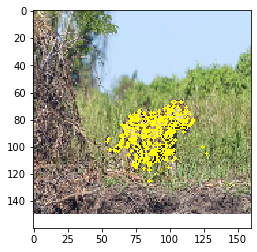

In [16]:
show_model_interpretation(imgs[0], model)

Let's look some images that were "100% predicted correctly" or close to it.

Following images belong to in this order:
1. cheetah
2. snow leopard
3. jaguar

For leopard, the image shown above in which the model predicted scored 72% at the highest, so we will omit it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


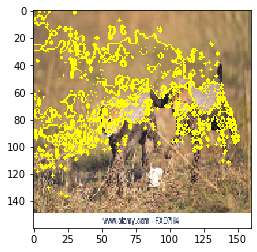

In [17]:
# cheetah
show_model_interpretation(imgs[4], model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


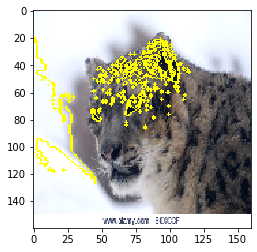

In [18]:
# snow leopard
show_model_interpretation(imgs[3], model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


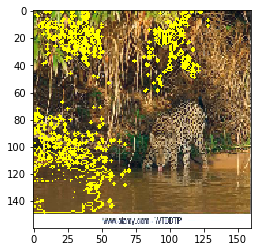

In [19]:
# jaguar
show_model_interpretation(imgs[12], model)

In this batch, two images were wrongly predicted. It would be the 11th and 15th images shown, at indices 20 and 28 in the batch, respective.

In [20]:
# 
(first_preds[[20,28]] * 100).astype(int)

array([[ 8,  0, 91,  0],
       [ 0, 56, 43,  0]])

Looks like for both mispredictions, the correct one is the second predictions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


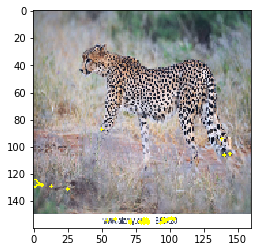

In [21]:
show_model_interpretation(imgs[10], model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


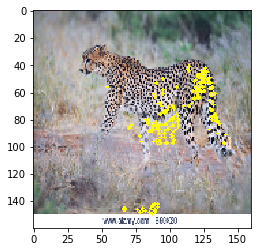

In [23]:
show_model_interpretation(imgs[10], model, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


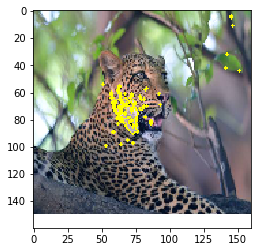

In [24]:
show_model_interpretation(imgs[14], model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


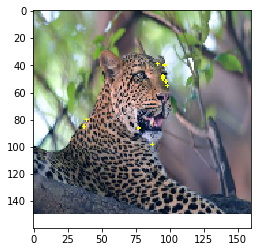

In [25]:
show_model_interpretation(imgs[14], model, 1)

## Interpreting 'my_model_2'

Let's analyze the model's predictions from the model generated by `my_model_2`

In [5]:
model_2 = keras.models.load_model('my_model_2')

In [9]:
# I will use the same batch of images, but with higher resolution
IMAGE_SIZE = (200, 200)
BATCH_SIZE = 32
NUM_CLASSES = 4

data_gen_2 = image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split = 0.2,
)

train_ds_2 = data_gen_2.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    seed=420
)

val_ds_2 = data_gen_2.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    subset='validation',
    seed=420
)
   
#print(train_ds, val_ds)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [30]:
first_labels_2, first_preds_2 = get_batch_preds(val_ds_2, model_2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

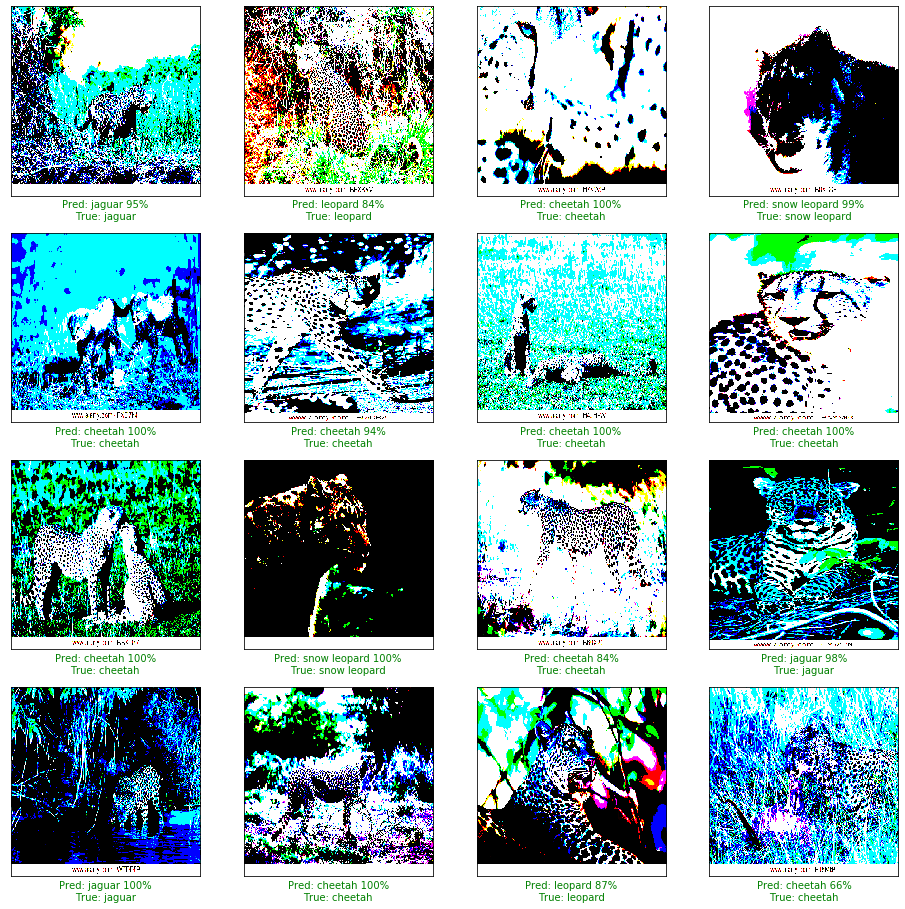

In [31]:
plot_batch(first_preds_2, first_labels_2, val_ds_2[0][0])

In [32]:
# it will use the new IMAGE_SIZE = (200, 200)
imgs_2 = transform_img_fn([os.path.join('dataset', img_path) for img_path in img_paths])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


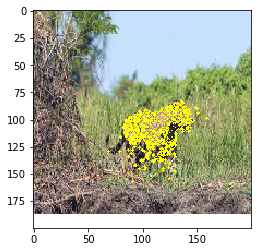

In [33]:
show_model_interpretation(imgs_2[0], model_2)

Let's examine those whose images were predicted close to 100% accuracy for each category.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


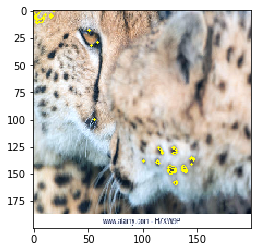

In [34]:
show_model_interpretation(imgs_2[2], model_2)

Accuracy: 100% cheetah

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


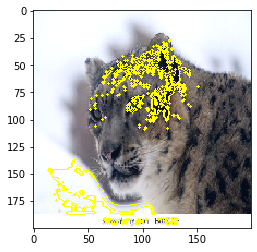

In [35]:
show_model_interpretation(imgs_2[3], model_2)

Accuracy: 99% snow leopard

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


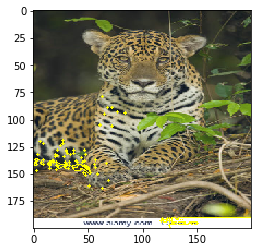

In [38]:
show_model_interpretation(imgs_2[11], model_2)

Accuracy: 98% jaguar

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


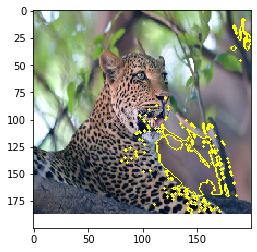

In [37]:
show_model_interpretation(imgs_2[14], model_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


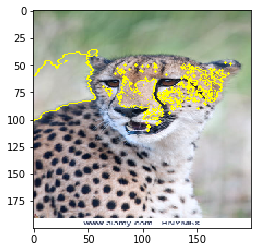

In [39]:
show_model_interpretation(imgs_2[7], model_2)

#### Another batch?

Let's check on another batch of images.

In [19]:
np.random.seed(420)

In [20]:
# pick a random batch
batch_num = int(np.random.random() * 25)
batch_num

7

In [21]:
rand_labels_2, rand_preds_2 = get_batch_preds(val_ds_2, model_2, batch_num)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

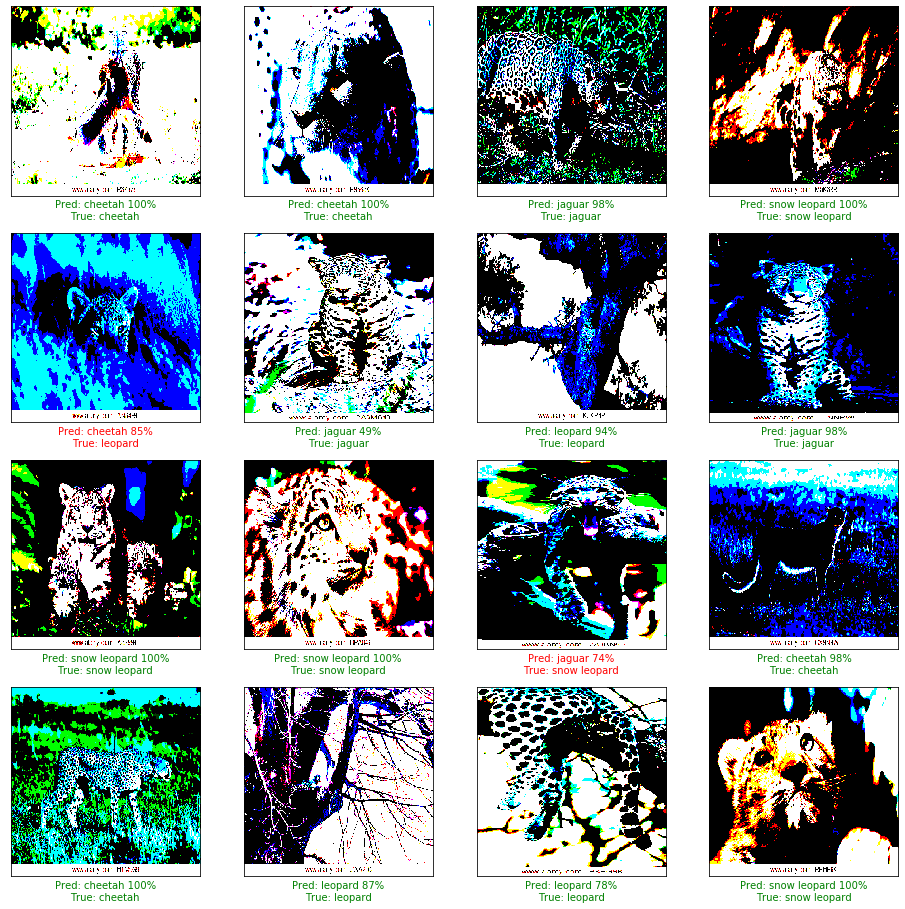

In [24]:
plot_batch(rand_preds_2, rand_labels_2, val_ds_2[batch_num][0])

In [25]:
img_paths_rand = np.array(val_ds_2.filenames)[val_ds_2.index_array[(BATCH_SIZE * 7):(BATCH_SIZE * 8):2]]
img_paths_rand

array(['cheetah/cheetah_203.jpg', 'cheetah/cheetah_116.jpg',
       'jaguar/2b044a0.jpg', 'snow leopard/snow leopard_091.jpg',
       'leopard/an34f9.jpg', 'jaguar/2a9m618.jpg',
       'leopard/leopard_103.jpg', 'jaguar/jaguar_149.jpg',
       'snow leopard/a32999.jpg', 'snow leopard/dpa043.jpg',
       'snow leopard/2a9bn9d.jpg', 'cheetah/cheetah_221.jpg',
       'cheetah/cheetah_210.jpg', 'leopard/jwa21c.jpg',
       'leopard/leopard_117.jpg', 'snow leopard/rehe6k.jpg'], dtype='<U33')

In [26]:
imgs_rand = transform_img_fn([os.path.join('dataset', img_path) for img_path in img_paths_rand])
imgs_rand

array([[[[ -12.939003  ,  -18.779     ,  -32.68      ],
         [   9.060997  ,    4.2210007 ,  -12.68      ],
         [   9.060997  ,    4.2210007 ,  -13.68      ],
         ...,
         [ -23.939003  ,  -25.779     ,  -48.68      ],
         [ -12.939003  ,  -21.779     ,  -40.68      ],
         [  -3.939003  ,  -17.779     ,  -38.68      ]],

        [[  -6.939003  ,  -12.778999  ,  -26.68      ],
         [   5.060997  ,    0.22100067,  -16.68      ],
         [  -1.939003  ,   -6.7789993 ,  -24.68      ],
         ...,
         [ -24.939003  ,  -23.779     ,  -48.68      ],
         [ -17.939003  ,  -23.779     ,  -45.68      ],
         [  -0.939003  ,  -11.778999  ,  -38.68      ]],

        [[  -8.939003  ,  -10.778999  ,  -25.68      ],
         [  -5.939003  ,   -7.7789993 ,  -24.68      ],
         [ -13.939003  ,  -14.778999  ,  -33.68      ],
         ...,
         [ -18.939003  ,  -16.779     ,  -44.68      ],
         [ -12.939003  ,  -15.778999  ,  -39.68      ],
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


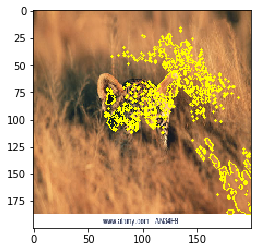

In [32]:
show_model_interpretation(imgs_rand[4], model_2)

In [34]:
(rand_preds_2[4*2] * 100).astype(int)

array([84,  0, 15,  0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


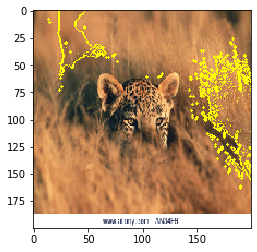

In [35]:
show_model_interpretation(imgs_rand[4], model_2, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


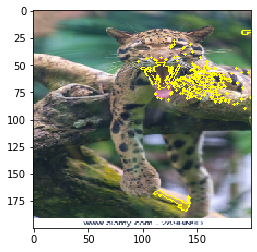

In [36]:
show_model_interpretation(imgs_rand[10], model_2)

In [37]:
(rand_preds_2[10*2] * 100).astype(int)

array([ 1, 74,  1, 22])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


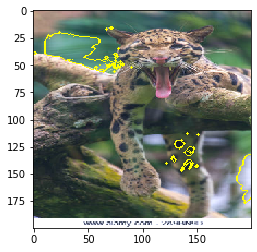

In [38]:
show_model_interpretation(imgs_rand[10], model_2, 1)